# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2018, 9, 1, 18, 40, 27, 228707)

In [3]:
now.year, now.month, now.day

(2018, 9, 1)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta


datetime.timedelta(926, 56700)

In [5]:
delta.days


926

In [6]:
delta.seconds

56700

In [7]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)


datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [9]:
stamp = datetime(2011, 1, 3)
str(stamp)


'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [13]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [16]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [18]:
idx[2]


NaT

In [19]:
pd.isnull(idx)

array([False, False,  True])

## Time Series Basics

In [20]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [21]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [14]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [23]:
ts.index.dtype

dtype('<M8[ns]')

In [24]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [25]:
stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [26]:
ts['1/10/2011']


1.9657805725027142

In [27]:
ts['20110110']

1.9657805725027142

In [28]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts


2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
2000-01-06   -1.296221
2000-01-07    0.274992
2000-01-08    0.228913
2000-01-09    1.352917
2000-01-10    0.886429
                ...   
2002-09-17   -0.139298
2002-09-18   -1.159926
2002-09-19    0.618965
2002-09-20    1.373890
2002-09-21   -0.983505
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [29]:
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
2001-01-06    0.106403
2001-01-07   -1.308228
2001-01-08    2.173185
2001-01-09    0.564561
2001-01-10   -0.190481
                ...   
2001-12-22    0.000369
2001-12-23    0.900885
2001-12-24   -0.454869
2001-12-25   -0.864547
2001-12-26    1.129120
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [30]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
2001-05-06    0.569497
2001-05-07    1.489410
2001-05-08    1.264250
2001-05-09   -0.761837
2001-05-10   -0.331617
                ...   
2001-05-22    0.503699
2001-05-23   -1.387874
2001-05-24    0.204851
2001-05-25    0.603705
2001-05-26    0.545680
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [32]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [31]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [33]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [34]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [35]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [36]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [37]:
dup_ts.index.is_unique

False

In [38]:
dup_ts['1/3/2000']  # not duplicated


4

In [39]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [40]:
grouped = dup_ts.groupby(level=0)
grouped.mean()


2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [41]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [42]:
ts


2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [44]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating Date Ranges

In [45]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [46]:
pd.date_range(start='2012-04-01', periods=20)


DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [47]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [48]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [49]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [52]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [53]:
four_hours = Hour(4)#传入一个整数即可定义偏移量的倍数
four_hours

<4 * Hours>

In [54]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [55]:
Hour(2) + Minute(30)

<150 * Minutes>

In [56]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [57]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [61]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.116696
2000-02-29    2.389645
2000-03-31   -0.932454
2000-04-30   -0.229331
Freq: M, dtype: float64

In [62]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.116696
2000-04-30    2.389645
Freq: M, dtype: float64

In [60]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [63]:
ts / ts.shift(1) - 1

2000-01-31          NaN
2000-02-29   -21.477561
2000-03-31    -1.390206
2000-04-30    -0.754057
Freq: M, dtype: float64

In [64]:
ts

2000-01-31   -0.116696
2000-02-29    2.389645
2000-03-31   -0.932454
2000-04-30   -0.229331
Freq: M, dtype: float64

In [65]:
ts.shift(2, freq='M')

2000-03-31   -0.116696
2000-04-30    2.389645
2000-05-31   -0.932454
2000-06-30   -0.229331
Freq: M, dtype: float64

In [66]:
ts.shift(3, freq='D')

2000-02-03   -0.116696
2000-03-03    2.389645
2000-04-03   -0.932454
2000-05-03   -0.229331
dtype: float64

In [67]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.116696
2000-02-29 01:30:00    2.389645
2000-03-31 01:30:00   -0.932454
2000-04-30 01:30:00   -0.229331
Freq: M, dtype: float64

#### Shifting dates with offsets

In [68]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [69]:
now + MonthEnd()


Timestamp('2011-11-30 00:00:00')

In [70]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [71]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [72]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [73]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts


2000-01-15   -1.140330
2000-01-19    0.439920
2000-01-23   -0.823758
2000-01-27   -0.520930
2000-01-31    0.350282
2000-02-04    0.204395
2000-02-08    0.133445
2000-02-12    0.327905
2000-02-16    0.072153
2000-02-20    0.131678
2000-02-24   -1.297459
2000-02-28    0.997747
2000-03-03    0.870955
2000-03-07   -0.991253
2000-03-11    0.151699
2000-03-15    1.266151
2000-03-19   -0.202469
2000-03-23    0.050718
2000-03-27    0.639869
2000-03-31    0.597594
Freq: 4D, dtype: float64

In [74]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.338963
2000-02-29    0.081409
2000-03-31    0.297908
dtype: float64

In [75]:
ts.resample('M').mean()

2000-01-31   -0.338963
2000-02-29    0.081409
2000-03-31    0.297908
Freq: M, dtype: float64

## Time Zone Handling

In [76]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [77]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [78]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.797246
2012-03-10 09:30:00    0.472879
2012-03-11 09:30:00    0.522356
2012-03-12 09:30:00   -0.546348
2012-03-13 09:30:00   -0.733537
2012-03-14 09:30:00    1.302736
Freq: D, dtype: float64

In [79]:
print(ts.index.tz)#其索引的tz字段为None

None


In [85]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [81]:
ts


2012-03-09 09:30:00   -0.797246
2012-03-10 09:30:00    0.472879
2012-03-11 09:30:00    0.522356
2012-03-12 09:30:00   -0.546348
2012-03-13 09:30:00   -0.733537
2012-03-14 09:30:00    1.302736
Freq: D, dtype: float64

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.797246
2012-03-10 09:30:00+00:00    0.472879
2012-03-11 09:30:00+00:00    0.522356
2012-03-12 09:30:00+00:00   -0.546348
2012-03-13 09:30:00+00:00   -0.733537
2012-03-14 09:30:00+00:00    1.302736
Freq: D, dtype: float64

In [84]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [87]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.797246
2012-03-10 04:30:00-05:00    0.472879
2012-03-11 05:30:00-04:00    0.522356
2012-03-12 05:30:00-04:00   -0.546348
2012-03-13 05:30:00-04:00   -0.733537
2012-03-14 05:30:00-04:00    1.302736
Freq: D, dtype: float64

In [88]:
ts

2012-03-09 09:30:00   -0.797246
2012-03-10 09:30:00    0.472879
2012-03-11 09:30:00    0.522356
2012-03-12 09:30:00   -0.546348
2012-03-13 09:30:00   -0.733537
2012-03-14 09:30:00    1.302736
Freq: D, dtype: float64

In [89]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')


2012-03-09 14:30:00+00:00   -0.797246
2012-03-10 14:30:00+00:00    0.472879
2012-03-11 13:30:00+00:00    0.522356
2012-03-12 13:30:00+00:00   -0.546348
2012-03-13 13:30:00+00:00   -0.733537
2012-03-14 13:30:00+00:00    1.302736
Freq: D, dtype: float64

In [90]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.797246
2012-03-10 15:30:00+01:00    0.472879
2012-03-11 14:30:00+01:00    0.522356
2012-03-12 14:30:00+01:00   -0.546348
2012-03-13 14:30:00+01:00   -0.733537
2012-03-14 14:30:00+01:00    1.302736
Freq: D, dtype: float64

In [91]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [103]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [ ]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

In [104]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [93]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [94]:
stamp_utc.value


1299902400000000000

In [95]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [96]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp


Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [97]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [98]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp


Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [99]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [100]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2012-03-07 09:30:00    0.022199
2012-03-08 09:30:00    0.364287
2012-03-09 09:30:00   -0.922839
2012-03-12 09:30:00    0.312656
2012-03-13 09:30:00   -1.128497
2012-03-14 09:30:00   -0.333488
2012-03-15 09:30:00   -0.514551
2012-03-16 09:30:00   -0.559782
2012-03-19 09:30:00   -0.783408
2012-03-20 09:30:00   -1.797685
Freq: B, dtype: float64

In [101]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## Periods and Period Arithmetic

In [4]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [5]:
p + 5


Period('2012', 'A-DEC')

In [6]:
p - 2

Period('2005', 'A-DEC')

In [7]:
pd.Period('2014', freq='A-DEC') - p

7

In [8]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [9]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.204708
2000-02    0.478943
2000-03   -0.519439
2000-04   -0.555730
2000-05    1.965781
2000-06    1.393406
Freq: M, dtype: float64

In [10]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [11]:
p = pd.Period('2007', freq='A-DEC')
p


Period('2007', 'A-DEC')

In [12]:
p.asfreq('M', how='start')


Period('2007-01', 'M')

In [13]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [14]:
p = pd.Period('2007', freq='A-JUN')
p


Period('2007', 'A-JUN')

In [15]:
p.asfreq('M', 'start')


Period('2006-07', 'M')

In [16]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [17]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [18]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2006    0.092908
2007    0.281746
2008    0.769023
2009    1.246435
Freq: A-DEC, dtype: float64

In [20]:
ts.asfreq('M',how='start')#根据年度时期的第一个月，每年的时期被取代为每月的时期

2006-01    0.092908
2007-01    0.281746
2008-01    0.769023
2009-01    1.246435
Freq: M, dtype: float64

In [19]:
ts.asfreq('B', how='end')#每年的最后一个工作日，我们可以使用“B”频率，并指明想要该时期的末尾

2006-12-29    0.092908
2007-12-31    0.281746
2008-12-31    0.769023
2009-12-31    1.246435
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [21]:
p = pd.Period('2012Q4', freq='Q-JAN')
p                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Period('2012Q4', 'Q-JAN')

In [22]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [23]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [24]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm


Period('2012-01-30 16:00', 'T')

In [25]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [26]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts


2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [27]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [28]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts


2000-01-31    1.007189
2000-02-29   -1.296221
2000-03-31    0.274992
Freq: M, dtype: float64

In [29]:
pts = ts.to_period()
pts

2000-01    1.007189
2000-02   -1.296221
2000-03    0.274992
Freq: M, dtype: float64

In [30]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2


2000-01-29    0.228913
2000-01-30    1.352917
2000-01-31    0.886429
2000-02-01   -2.001637
2000-02-02   -0.371843
2000-02-03    1.669025
Freq: D, dtype: float64

In [31]:
ts2.to_period('M')

2000-01    0.228913
2000-01    1.352917
2000-01    0.886429
2000-02   -2.001637
2000-02   -0.371843
2000-02    1.669025
Freq: M, dtype: float64

In [32]:
pts = ts2.to_period()
pts


2000-01-29    0.228913
2000-01-30    1.352917
2000-01-31    0.886429
2000-02-01   -2.001637
2000-02-02   -0.371843
2000-02-03    1.669025
Freq: D, dtype: float64

In [33]:
pts.to_timestamp(how='end')

2000-01-29    0.228913
2000-01-30    1.352917
2000-01-31    0.886429
2000-02-01   -2.001637
2000-02-02   -0.371843
2000-02-03    1.669025
Freq: D, dtype: float64

### Creating a PeriodIndex from Arrays

In [34]:
data = pd.read_csv('C:/Users/owolf/Desktop/pydata/examples/macrodata.csv')
data.head(5)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [35]:
data.year


0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
        ...  
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [36]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
      ... 
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [37]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
index


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [38]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
          ... 
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

In [41]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2000-01-01   -0.438570
2000-01-02   -0.539741
2000-01-03    0.476985
2000-01-04    3.248944
2000-01-05   -1.021228
2000-01-06   -0.577087
2000-01-07    0.124121
2000-01-08    0.302614
2000-01-09    0.523772
2000-01-10    0.000940
                ...   
2000-03-31    1.581700
2000-04-01   -0.528735
2000-04-02    0.457002
2000-04-03    0.929969
2000-04-04   -1.569271
2000-04-05   -1.022487
2000-04-06   -0.402827
2000-04-07    0.220487
2000-04-08   -0.193401
2000-04-09    0.669158
Freq: D, Length: 100, dtype: float64

In [42]:
ts.resample('M').mean()


2000-01-31   -0.299862
2000-02-29   -0.105373
2000-03-31    0.273377
2000-04-30   -0.160012
Freq: M, dtype: float64

In [43]:
ts.resample('M', kind='period').mean()

2000-01   -0.299862
2000-02   -0.105373
2000-03    0.273377
2000-04   -0.160012
Freq: M, dtype: float64

### Downsampling

In [45]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [46]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [47]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [48]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [49]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

In [50]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [51]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-1.648985,-2.252797,-1.166832,0.353607
2000-01-12,0.702110,-0.274569,-0.139142,0.107657


In [52]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-1.648985,-2.252797,-1.166832,0.353607
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.702110,-0.274569,-0.139142,0.107657


In [53]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-1.648985,-2.252797,-1.166832,0.353607
2000-01-06,-1.648985,-2.252797,-1.166832,0.353607
2000-01-07,-1.648985,-2.252797,-1.166832,0.353607
2000-01-08,-1.648985,-2.252797,-1.166832,0.353607
2000-01-09,-1.648985,-2.252797,-1.166832,0.353607
2000-01-10,-1.648985,-2.252797,-1.166832,0.353607
2000-01-11,-1.648985,-2.252797,-1.166832,0.353607
2000-01-12,0.702110,-0.274569,-0.139142,0.107657


In [54]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-1.648985,-2.252797,-1.166832,0.353607
2000-01-06,-1.648985,-2.252797,-1.166832,0.353607
2000-01-07,-1.648985,-2.252797,-1.166832,0.353607
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.702110,-0.274569,-0.139142,0.107657


In [55]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-1.648985,-2.252797,-1.166832,0.353607
2000-01-13,0.702110,-0.274569,-0.139142,0.107657


### Resampling with Periods

In [56]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]


,Colorado,Texas,New York,Ohio
2000-01,-0.606545,-0.417064,-0.017007,-1.224145
2000-02,-1.800840,1.634736,0.989008,0.457940
2000-03,0.555154,1.306720,-0.440554,-0.301350
2000-04,0.498791,-0.823991,1.320566,0.507965
2000-05,-0.653438,0.186980,-0.391725,-0.272293


In [57]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.041723,0.279241,0.222087,-0.073888
2001,0.131701,-0.286176,-0.049314,-0.074481


In [58]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()


,Colorado,Texas,New York,Ohio
2000Q1,-0.041723,0.279241,0.222087,-0.073888
2000Q2,-0.041723,0.279241,0.222087,-0.073888
2000Q3,-0.041723,0.279241,0.222087,-0.073888
2000Q4,-0.041723,0.279241,0.222087,-0.073888
2001Q1,0.131701,-0.286176,-0.049314,-0.074481
2001Q2,0.131701,-0.286176,-0.049314,-0.074481
2001Q3,0.131701,-0.286176,-0.049314,-0.074481
2001Q4,0.131701,-0.286176,-0.049314,-0.074481


In [59]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.041723,0.279241,0.222087,-0.073888
2001Q1,-0.041723,0.279241,0.222087,-0.073888
2001Q2,-0.041723,0.279241,0.222087,-0.073888
2001Q3,-0.041723,0.279241,0.222087,-0.073888
2001Q4,0.131701,-0.286176,-0.049314,-0.074481


In [60]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.041723,0.279241,0.222087,-0.073888
2001Q1,-0.041723,0.279241,0.222087,-0.073888
2001Q2,-0.041723,0.279241,0.222087,-0.073888
2001Q3,-0.041723,0.279241,0.222087,-0.073888
2001Q4,0.131701,-0.286176,-0.049314,-0.074481
2002Q1,0.131701,-0.286176,-0.049314,-0.074481
2002Q2,0.131701,-0.286176,-0.049314,-0.074481
2002Q3,0.131701,-0.286176,-0.049314,-0.074481


## Moving Window Functions

In [66]:
close_px_all = pd.read_csv('C:/Users/owolf/Desktop/pydata/examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
2003-01-10,7.36,21.97,29.03
2003-01-13,7.32,22.16,28.91
2003-01-14,7.30,22.39,29.17
2003-01-15,7.22,22.11,28.77


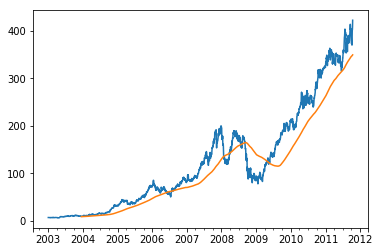

In [65]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

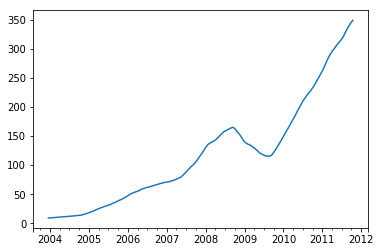

In [67]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [68]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

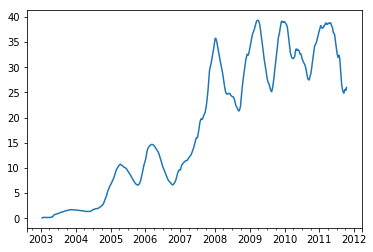

In [69]:
appl_std250.plot()

In [70]:
expanding_mean = appl_std250.expanding().mean()

In [71]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

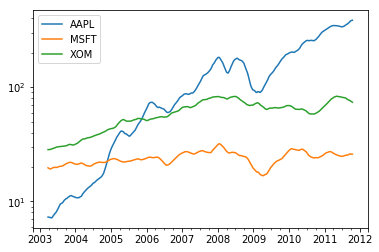

In [72]:
close_px.rolling(60).mean().plot(logy=True)

In [73]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### Exponentially Weighted Functions

In [ ]:
plt.figure()

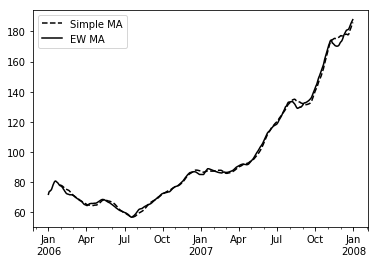

In [74]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

In [ ]:
plt.figure()

In [75]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

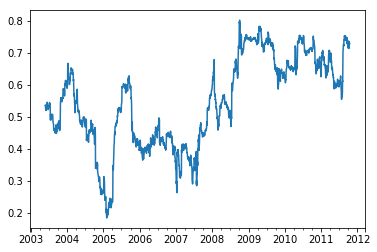

In [76]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

In [ ]:
plt.figure()

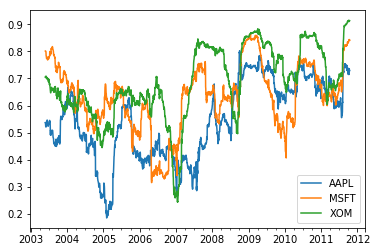

In [77]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

In [ ]:
plt.figure()

D:\Programing\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


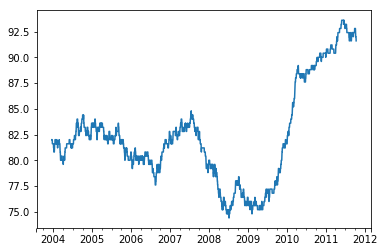

In [78]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [ ]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion